<a href="https://colab.research.google.com/github/SolbiChoi/test_deeplearning/blob/master/mnist_classification02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from tensorflow.keras.datasets.mnist import load_data

In [41]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
x_train.shape, y_train.shape, x_test.shape, y_test.shape  # (행, 열, 밀어넣는..3차원)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [42]:
# y_train[4], x_train[4]
y_train[50000], x_train[50000]

(3, array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 160, 195,
         205,  71,  86,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 238, 254, 254,
         254, 254, 254, 227,  84,   0,   0,   0,   0,   0,   0,   0,   0,
         

3


(None, numpy.uint8)

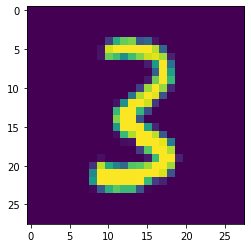

In [43]:
import matplotlib.pyplot as plt
plt.imshow(x_train[50000])
print(y_train[50000]), type(y_train[50000])

In [44]:
x_train = x_train.reshape(-1,28*28) / 255  # 255로 나누는 이유 : x_train max값, 값 scaling (min max scale)
x_train.shape

(60000, 784)

In [45]:
x_test = x_test.reshape(-1,28*28) / 255
x_test.shape

(10000, 784)

In [46]:
y_train.shape

(60000,)

In [47]:
y_train[2:10]

array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [48]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Apply model

In [49]:
import tensorflow as tf

In [50]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(784,))) # input layer - reshape후 열의 숫자 입력
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
# 분류 3개 이상일 때 -> softmax, binary -> sigmoid (hidden에서만 사용)
model.add(tf.keras.layers.Dense(10, activation='softmax')) # output layer

# regression -> loss : mse
# binary classification -> loss : binary crossentropy
# over 3 classification -> loss : categorical cross entropy (sparse_categorical_crossentropy)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [51]:
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3202 - acc: 0.9065 - val_loss: 0.1785 - val_acc: 0.9476
Epoch 2/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1412 - acc: 0.9572 - val_loss: 0.1465 - val_acc: 0.9568
Epoch 3/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1025 - acc: 0.9693 - val_loss: 0.1240 - val_acc: 0.9647
Epoch 4/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0797 - acc: 0.9753 - val_loss: 0.1296 - val_acc: 0.9636
Epoch 5/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0625 - acc: 0.9811 - val_loss: 0.1130 - val_acc: 0.9665
Epoch 6/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0524 - acc: 0.9837 - val_loss: 0.1142 - val_acc: 0.9688
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0427 - acc: 0.9860 - val_loss: 0.1212 - val_acc: 0.9678
Epoch 8/100
1313/1313 [==============================] 

## evaluation

In [52]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

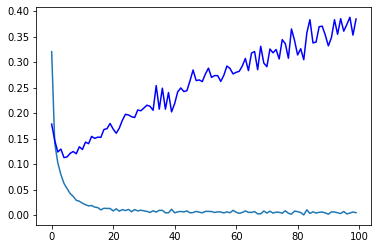

In [53]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'b-')
plt.show()

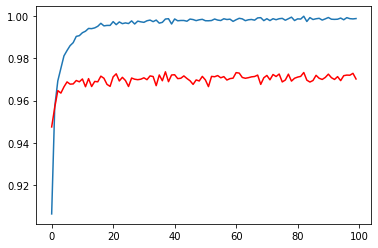

In [54]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'-r')
plt.show()

## service

In [55]:
# x_test[30]

In [56]:
# pred = model.predict([x_test[30:31]])  # 사이즈(영역)를 명확하게 지정해주어야 한다.

In [72]:
import numpy as np
# np.set_printoptions(precision=8)

pred = model.predict([x_test[30:31]])
pred

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [77]:
np.argmax(pred, axis=1)

array([3])

In [78]:
y_test[30]

3

### numpy.argmax 위치값을 가져옴 example

In [60]:
a = np.arange(6).reshape(2,3) + 10
print(a)
np.argmax(a, axis=0)

[[10 11 12]
 [13 14 15]]


array([1, 1, 1])

In [61]:
np.argmax(np.array([[10,11,12]]), axis=1)

array([2])

## save

In [62]:
model.save('./model_save')

INFO:tensorflow:Assets written to: ./model_save/assets


In [63]:
model.save('./model_save01.h5')

In [79]:
model_load = tf.keras.models.load_model('./model_save01.h5')
model_load

In [80]:
model_load = tf.keras.models.load_model('./model_save01.h5')

In [81]:
load_pred = model_load.predict(x_test[30:31])
load_pred

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)